In [1]:
import numpy as np

import os
#Choose GPU 0 as a default
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import Model
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import sys
sys.path.append('/home/zsteineh/cnn_hilbert/cnn_hilbert_workspace')
import hilbert_DL_utils
from hilbert_DL_utils import load_data

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [2]:
pretask_type = ['rel_pos', 'sig_tran']
model_types = ['pretask', 'tl', 'ts']
datatype = "speech" #model or speech
data_dict = {"model": "Movement", "speech": "Speech"}
if datatype == "speech":
        pats_ids_in = ['a0f66459','cb46fd46','b45e3f7b']
else:
    pats_ids_in = ['a0f66459','c95c1e82','cb46fd46','fcb01f7a','ffb52f92','b4ac1726',
               'f3b79359','ec761078','f0bbc9a9','abdb496b','ec168864','b45e3f7b']
sp = '/home/zsteineh/ez_ssl_results/'
if datatype == 'model':
    name = pretask_type[0]+model_types[1]+'_acc_dict'
else:
    name = pretask_type[0]+datatype+model_types[1]+'_acc_dict'
with open(sp+'obj/' + name + '.pkl', 'rb') as f:
        acc_dict = pickle.load(f)

In [3]:
sbj_accs = []
for pretask in pretask_type:
    for model in model_types:
        if datatype == 'model':
            name = pretask+model+'_acc_dict'
        else:
            name = pretask+datatype+model+'_acc_dict'
        with open(sp+'obj/' + name + '.pkl', 'rb') as f:
            acc_dict = pickle.load(f)
        for sbj in acc_dict:
            for accs_set in acc_dict[sbj]:
                accs = [pretask, model, sbj]
                for acc in accs_set:
                    accs.append(acc)
                sbj_accs.append(accs)
sbj_acc_df = pd.DataFrame.from_records(sbj_accs, columns = ['Pretask','Model','Subject', 'Train', 'Val', 'Test'])
print(sbj_acc_df)

     Pretask    Model   Subject     Train       Val      Test
0    rel_pos  pretask  a0f66459  0.558974  0.583333  0.570552
1    rel_pos  pretask  a0f66459  0.615385  0.687500  0.668712
2    rel_pos  pretask  a0f66459  0.492308  0.562500  0.656442
3    rel_pos  pretask  cb46fd46  0.557447  0.465517  0.520295
4    rel_pos  pretask  cb46fd46  0.574468  0.603448  0.535055
5    rel_pos  pretask  cb46fd46  0.519149  0.517241  0.472325
6    rel_pos  pretask  b45e3f7b  0.551020  0.591837  0.495798
7    rel_pos  pretask  b45e3f7b  0.459184  0.469388  0.483193
8    rel_pos  pretask  b45e3f7b  0.489796  0.326531  0.512605
9    rel_pos       tl  a0f66459  0.994872  0.937500  0.938650
10   rel_pos       tl  a0f66459  1.000000  0.979167  0.957055
11   rel_pos       tl  a0f66459  0.989744  0.979167  0.932515
12   rel_pos       tl  cb46fd46  1.000000  0.948276  0.523985
13   rel_pos       tl  cb46fd46  0.982979  0.931034  0.542435
14   rel_pos       tl  cb46fd46  1.000000  1.000000  0.538745
15   rel

/home/zsteineh/anaconda3/envs/ez_ss_dl_venv/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
sbj_mean_accs = []
for pretask in pretask_type:
    for model in model_types:
        if datatype == 'model':
            name = pretask+model+'_acc_dict'
        else:
            name = pretask+datatype+model+'_acc_dict'
        with open(sp+'obj/' + name + '.pkl', 'rb') as f:
            acc_dict = pickle.load(f)
        for sbj in acc_dict:
            means = [0, 0, 0]
            for accs_set in acc_dict[sbj]:
                accs = [pretask, model, sbj]
                means[0] += accs_set[0]
                means[1] += accs_set[1]
                means[2] += accs_set[2]
            for m, mean in enumerate(means):
                means[m] = mean / len(acc_dict[sbj])
                accs.append(means[m])
            sbj_mean_accs.append(accs)
sbj_mean_accs = pd.DataFrame.from_records(sbj_mean_accs, columns = ['Pretask','Model','Subject', 'Train', 'Val', 'Test'])
print(sbj_mean_accs)


     Pretask    Model   Subject     Train       Val      Test
0    rel_pos  pretask  a0f66459  0.555556  0.611111  0.631902
1    rel_pos  pretask  cb46fd46  0.550355  0.528736  0.509225
2    rel_pos  pretask  b45e3f7b  0.500000  0.462585  0.497199
3    rel_pos       tl  a0f66459  0.994872  0.965278  0.942740
4    rel_pos       tl  cb46fd46  0.994326  0.959770  0.535055
5    rel_pos       tl  b45e3f7b  0.986395  0.931973  0.871148
6    rel_pos       ts  a0f66459  0.991453  0.951389  0.899796
7    rel_pos       ts  cb46fd46  0.980142  0.896552  0.535055
8    rel_pos       ts  b45e3f7b  0.984694  0.897959  0.833333
9   sig_tran  pretask  a0f66459  0.512821  0.486111  0.501022
10  sig_tran  pretask  cb46fd46  0.510638  0.568966  0.488315
11  sig_tran  pretask  b45e3f7b  0.510204  0.551020  0.498599
12  sig_tran       tl  a0f66459  0.958974  0.944444  0.918200
13  sig_tran       tl  cb46fd46  0.948936  0.925287  0.532595
14  sig_tran       tl  b45e3f7b  0.925170  0.829932  0.743697
15  sig_

In [5]:
short_names = [sbj[:3] for sbj in pats_ids_in]
print(short_names)

['a0f', 'cb4', 'b45']


/home/zsteineh/anaconda3/envs/ez_ss_dl_venv/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


<ipython-input-6-b20fa877021c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plt.set_xticklabels(short_names,rotation=40)


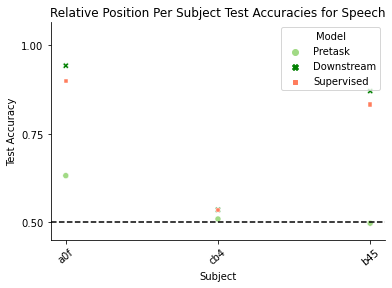

<ipython-input-6-b20fa877021c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plt.set_xticklabels(short_names,rotation=40)


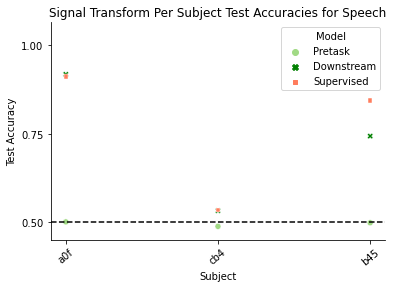

In [6]:
correct_model_labels = ['Pretask', 'Downstream', 'Supervised']
correct_pretask_labels = {'rel_pos':'Relative Position', 'sig_tran':'Signal Transform'}
my_pal = {"pretask": '#A1DA85', "tl": 'g', "ts": '#FF7D5D'}
# plot some subject specific stuff

for pre in pretask_type:
    my_plt = sns.scatterplot(x = 'Subject', y = 'Test', hue = 'Model', 
                      data = sbj_mean_accs.loc[sbj_mean_accs['Pretask'] == pre], palette=my_pal, style = 'Model')
    my_plt.set_xticklabels(short_names,rotation=40)
    my_plt.set_title(correct_pretask_labels[pre]+' Per Subject Test Accuracies for '+ data_dict[datatype])
    my_plt.set_ylim([(1/2)-.05,1.065])
    my_plt.set_yticks([.5,.75,1])
    my_plt.spines['right'].set_visible(False)
    my_plt.spines['top'].set_visible(False)
    leg = my_plt.get_legend()
    for t, l in zip(leg.texts, correct_model_labels): t.set_text(l)
    my_plt.axhline(1/2,c='k',linestyle='--')
    my_plt.set_ylabel('Test Accuracy')
    plt.show()

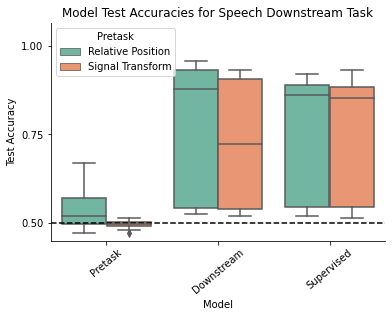

In [7]:
my_plt = sns.boxplot(x = 'Model', y = 'Test', hue = 'Pretask', data = sbj_acc_df, palette='Set2')
my_plt.set_xticklabels(my_plt.get_xticklabels(),rotation=40)
my_plt.set_title('Model Test Accuracies for '+ data_dict[datatype] +' Downstream Task')
my_plt.set_ylim([(1/2)-.05,1.065])
my_plt.set_yticks([.5,.75,1])
my_plt.axhline(1/2,c='k',linestyle='--')
my_plt.spines['right'].set_visible(False)
my_plt.spines['top'].set_visible(False)
my_plt.set_ylabel('Test Accuracy')
my_plt.set_xticklabels(correct_model_labels)
leg = my_plt.get_legend()
for t, l in zip(leg.texts, correct_pretask_labels.values()): t.set_text(l)
plt.show()

In [8]:
# Get the averages for the above box plots
print("Averages for rel_pos: ", sbj_acc_df.loc[sbj_acc_df['Pretask'] == 'rel_pos'].groupby('Model')['Test'].mean())
print("Averages for sig_tran: ", sbj_acc_df.loc[sbj_acc_df['Pretask'] == 'sig_tran'].groupby('Model')['Test'].mean())

Averages for rel_pos:  Model
pretask    0.546109
tl         0.782981
ts         0.756061
Name: Test, dtype: float64
Averages for sig_tran:  Model
pretask    0.495979
tl         0.731498
ts         0.763476
Name: Test, dtype: float64


In [9]:
# Kruskal-Wallis test (non-parametric ANOVA)
print(pg.friedman(data=sbj_acc_df, dv='Test', within='Model', subject='Subject')['p-unc'])

# Wilcoxon tests (non-parametric t-tests)
# Computes tests at the data snapshot
p_vals = []
n_models = len(model_types)
for i in range(n_models):
    for j in range(i+1,n_models):
        val1 = sbj_acc_df[(sbj_acc_df['Model'] == model_types[i])].iloc[:,5].values
        val2 = sbj_acc_df[(sbj_acc_df['Model'] == model_types[j])].iloc[:,5].values
        p_vals.append(float(pg.wilcoxon(val1, val2)['p-val']))

# Correct for multiple comparisons
_,p_vals = pg.multicomp(np.asarray(p_vals), alpha=0.05, method='fdr_bh')

pval_df = np.zeros([n_models,n_models])
q = 0
for i in range(n_models):
    for j in range(i+1,n_models):
        pval_df[i,j] = p_vals[q]
        q += 1

# Create output df with p_values
df_pval = pd.DataFrame(pval_df,columns=model_types,index=model_types)
df_pval[df_pval==0] = np.nan
print(df_pval)

Friedman    0.096972
Name: p-unc, dtype: float64
         pretask        tl        ts
pretask      NaN  0.000023  0.000023
tl           NaN       NaN  0.831726
ts           NaN       NaN       NaN


In [10]:
# Kruskal-Wallis test (non-parametric ANOVA)
print(pg.friedman(data=sbj_acc_df, dv='Test', within='Pretask', subject='Subject')['p-unc'])
# Looks like this isn't significant between the diff pretasks

Friedman    0.083265
Name: p-unc, dtype: float64


In [11]:
# Wilcoxon tests (non-parametric t-tests)
# Computes tests at the data snapshot
p_vals = []
n_models = len(model_types)
n_pretasks = len(pretask_type)

for pretask in range(n_pretasks):
    print("running model comparison stats for", pretask_type[pretask])
    pretask_df = sbj_acc_df[(sbj_acc_df['Pretask'] == pretask_type[pretask])]
    p_vals = []
    for i in range(n_models):
        for j in range(i+1,n_models):
            val1 = pretask_df[(pretask_df['Model'] == model_types[i])].iloc[:,5].values
            val2 = pretask_df[(pretask_df['Model'] == model_types[j])].iloc[:,5].values
            p_vals.append(float(pg.wilcoxon(val1, val2)['p-val']))

    # Correct for multiple comparisons
    _,p_vals = pg.multicomp(np.asarray(p_vals), alpha=0.05, method='fdr_bh')

    pval_df = np.zeros([n_models,n_models])
    q = 0
    for i in range(n_models):
        for j in range(i+1,n_models):
            pval_df[i,j] = p_vals[q]
            q += 1

    # Create output df with p_values
    df_pval = pd.DataFrame(pval_df,columns=model_types,index=model_types)
    df_pval[df_pval==0] = np.nan
    print(df_pval)

running model comparison stats for rel_pos
         pretask        tl        ts
pretask      NaN  0.011719  0.011719
tl           NaN       NaN  0.054688
ts           NaN       NaN       NaN
running model comparison stats for sig_tran
         pretask        tl        ts
pretask      NaN  0.005859  0.005859
tl           NaN       NaN  0.250000
ts           NaN       NaN       NaN
